In [1]:
import sys
sys.path.insert(0, "/home/ubuntu/data/code/Modules/")
import CNN_Module as cnn_module
import DataGenerator_3d
import numpy as np
import random
import pickle
import models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
import imp
imp.reload(models)

<module 'models' from '/home/ubuntu/data/code/Modules/models.py'>

In [ ]:
import time
#result_acc = []
#result_val_acc = []
start = time.time()
for repeat in np.arange(0,1):
    print('repeat =', repeat)
    #prep cells for feeding into CNN
    control_cells = np.array(cnn_module.findallcells_indir('/home/ubuntu/data/resistant/'))
    sus_cells     = np.array(cnn_module.findallcells_indir('/home/ubuntu/data/susceptible/'))
    print(len(control_cells))
    print(len(sus_cells))

    #label cells, and split cells into test and train, making sure to have equal proportion of sus and ctrl in both
    control_cells_label = cnn_module.create_label_dict(control_cells,0)
    sus_cells_label  = cnn_module.create_label_dict(sus_cells,1)

    train_ctrl, test_ctrl = cnn_module.split_train_test(control_cells_label,0.8)
    train_sus, test_sus = cnn_module.split_train_test(sus_cells_label,0.8)

    train_labels = train_ctrl+train_sus
    test_labels = test_ctrl+test_sus

    video_path = '/cropped_video100_140'
    sample_gap = 10
    depth = 10
    #im_paths_train, im_labels_train = cnn_module.get_labels_images_3d(train_labels,test_labels,video_path,sample_gap,depth)
    im_paths_train, im_labels_train, im_paths_test, im_labels_test = cnn_module.get_labels_images_3d(train_labels,test_labels,video_path,sample_gap,depth)
    random.shuffle(im_paths_train)
    random.shuffle(im_paths_test)

    sequence_length=10
    
    ## MODEL 
    model = models.get_luke_3d_model2(input_shape=(140,100,1),sequence_length=sequence_length)
    
    augment_train, augment_valid = cnn_module.get_augmentations_train_test()
    params_train, params_test = cnn_module.get_params_train_test(140,100,augment_valid,augment_valid)
    params_train['dim']=(sequence_length,140,100)
    params_test['dim']=(sequence_length,140,100)

    training_generator = DataGenerator_3d.DataGenerator(im_paths_train, im_labels_train, **params_train,depth=depth)
    prediction_generator = DataGenerator_3d.DataGenerator(im_paths_test, im_labels_test, **params_test,depth=depth)

    epochs=25
    stepsperepoch=100
    validate_steps = len(im_paths_test)//32
    fully_train_model = cnn_module.fit_model(model,training_generator,prediction_generator,epochs,stepsperepoch,validate_steps,params_train,params_test)
    
    run_val_acc = model.history.history['val_acc']
    run_acc = model.history.history['acc']
    run_loss = model.history.history['loss']
    run_val_loss = model.history.history['val_loss']
    result_val_acc.append(run_val_acc)
    result_acc.append(run_acc)
end = time.time()
print('time =', end-start)

repeat = 0
311
351




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/25





100/100 [==============================] - 74s 744ms/step - loss: 0.6917 - acc: 0.5353 - val_loss: 0.6895 - val_acc: 0.6268
Epoch 2/25
100/100 [==============================] - 60s 596ms/step - loss: 0.6884 - acc: 0.6119 - val_loss: 0.6837 - val_acc: 0.6596
Epoch 3/25
100/100 [==============================] - 59s 593ms/step - loss: 0.6850 - acc: 0.6478 - val_loss: 0.6781 - val_acc: 0.6720
Epoch 4/25
100/100 [==============================] - 60s 596ms/step - loss: 0.6795 - acc: 0.6897 - val_loss: 0.6709 - val_acc: 0.6631
Epoch 5/25
100/100 [==============================] - 59s 595ms/step - loss: 0.6727 - acc: 0.7119 - val_loss: 0.6619 - val_acc: 0.6498
Epoch 6/25
100/100 [==============================] - 60s 596ms/step - loss: 0.6657

In [ ]:
print(result_val_acc)
print(result_acc)
####################
result = [result_val_acc,result_acc]

In [ ]:
pickle.dump(result,open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_cipro.p','wb'))

In [ ]:
result_all=pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_cipro.p','rb'))

In [ ]:
x_vals=np.arange(1,26)


plt.style.use('seaborn-darkgrid')

plt.scatter(x_vals,run_val_acc,marker='o', alpha= 0.5, label='val acc',color='red')
plt.scatter(x_vals,run_acc,marker='o', alpha= 0.5, label='acc',color='blue')
#plt.errorbar(x_vals,data_av,std,elinewidth=2,color='maroon',label='std')
plt.legend(loc='upper left',frameon=True, fontsize=12)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 25, 5))
plt.ylim(0.4,1)

plt.show()

plt.style.use('seaborn-darkgrid')

plt.scatter(x_vals,run_val_loss,marker='o', alpha= 0.5, label='val loss',color='red')
plt.scatter(x_vals,run_loss,marker='o', alpha= 0.5, label='loss',color='blue')
#plt.errorbar(x_vals,data_av,std,elinewidth=2,color='maroon',label='std')
plt.legend(loc='lower left',frameon=True, fontsize=12)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Loss', size = 15)
plt.xticks(np.arange(0, 25, 5))

plt.show()

([<matplotlib.axis.XTick at 0x7f16c08a9ac8>,
 <a list of 5 Text xticklabel objects>)

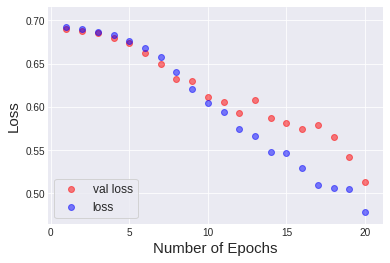

In [7]:
x_vals=np.arange(1,21)


plt.style.use('seaborn-darkgrid')

plt.scatter(x_vals,run_val_loss,marker='o', alpha= 0.5, label='val loss',color='red')
plt.scatter(x_vals,run_loss,marker='o', alpha= 0.5, label='loss',color='blue')
#plt.errorbar(x_vals,data_av,std,elinewidth=2,color='maroon',label='std')
plt.legend(loc='lower left',frameon=True, fontsize=12)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Loss', size = 15)
plt.xticks(np.arange(0, 25, 5))

In [6]:
###first run: unhash list_res and list_av to open blank list, then hash out for repeats.
###Rerun with new result_all to add data to list_res and list_av
#if closing and reopening use list_res = pickle.load(open('/home/ubuntu/data/code/3dCNN/test_result_all','rb'))
#list_res = []
#list_av = []
averages = np.average([(np.array(i)[1]) for i in result_val_acc])
print(averages)

#
##list_res.extend(result_all)
#print(len(list_res))
#print(list_res)

#list_av.extend([averages])
#print(len(list_av))
#print(list_av)


0.6501551402851622


In [ ]:
xvals = np.arange(1,26)
plt.plot(xvals, averages)

In [ ]:
##save and reload total data set
pickle.dump(list_res,open('/home/ubuntu/data/code/3dCNN/test_result_all','wb'))
pickle.dump(list_av,open('/home/ubuntu/data/code/3dCNN/test_av_all','wb'))

In [2]:
import pickle
data=pickle.load(open('/home/ubuntu/data/code/3dCNN/test_result_all','rb'))
data_av=pickle.load(open('/home/ubuntu/data/code/3dCNN/test_av_all','rb'))

In [3]:
data_av

[0.6211805587013564,
 0.6571180544793606,
 0.7272569417953492,
 0.6993055570870639,
 0.7239583348234494,
 0.7324652779847384,
 0.6836805567145348]

In [ ]:
x_vals=[1,5,10,15,20,25,30]

#bests = [np.max(np.array(i)[:,1]) for i in data]
#stds = [np.std(np.array(i)[:,1]) for i in data]

plt.style.use('seaborn-darkgrid')

plt.scatter(np.array(data)[:,0],np.array(data)[:,1],marker='x', alpha= 0.5, label='Individual runs',color='black')
plt.scatter(x_vals,data_av, marker='o', s= 75, label='Averages',color='yellow', edgecolors='black',linewidth=1)
#plt.errorbar(x_vals,data_av,std,elinewidth=2,color='maroon',label='std')
plt.legend(loc='lower right',frameon=True, fontsize=12)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.xlim(0,31)
plt.ylim(0.5,0.80)

#plt.savefig('/home/ubuntu/data/figs/3dEpochs.png', dpi=500)